Bessel Funktionen plotten:

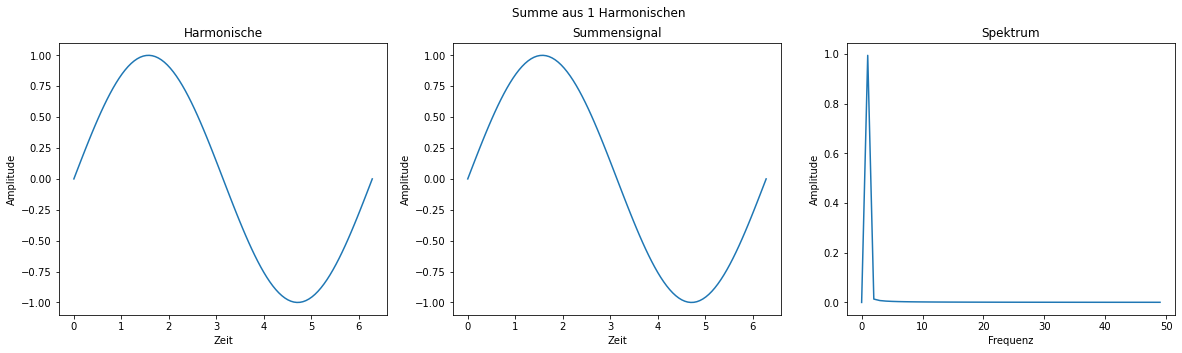

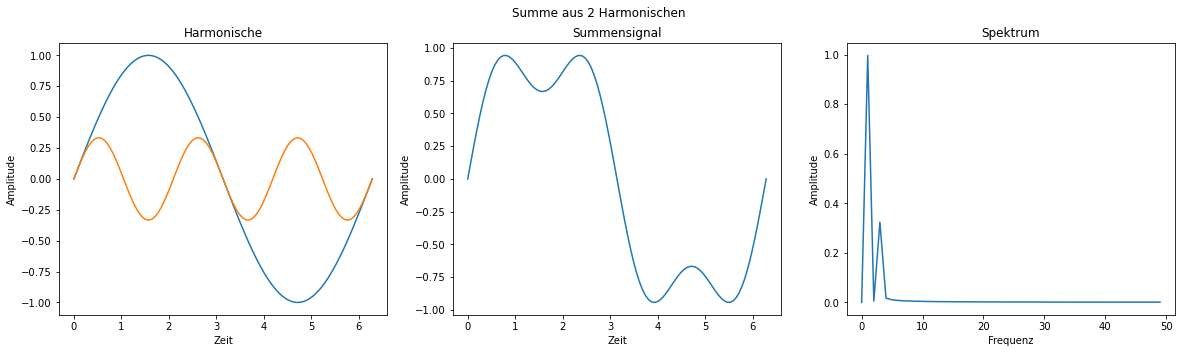

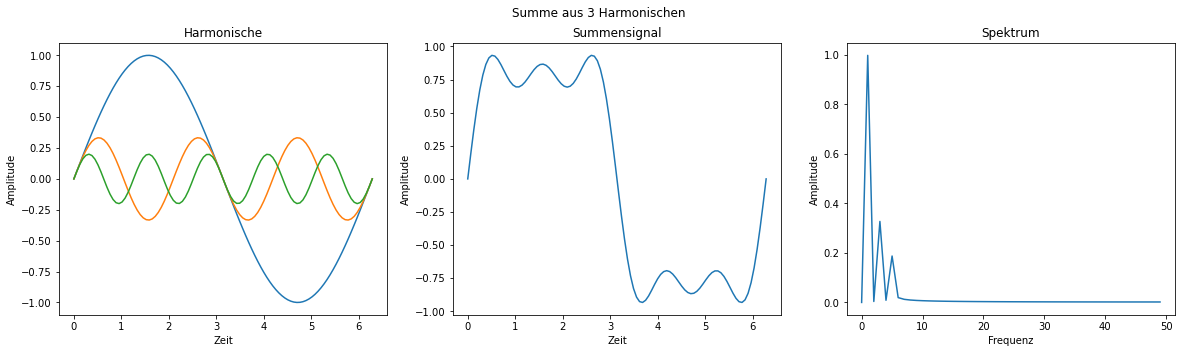

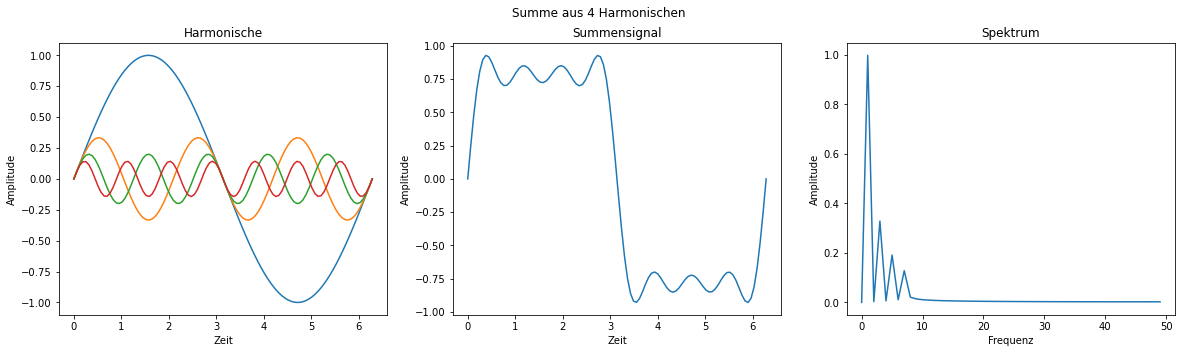

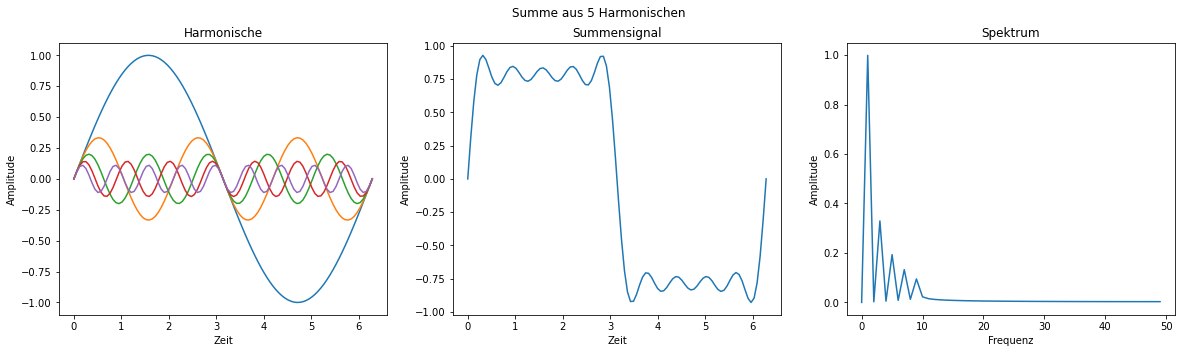

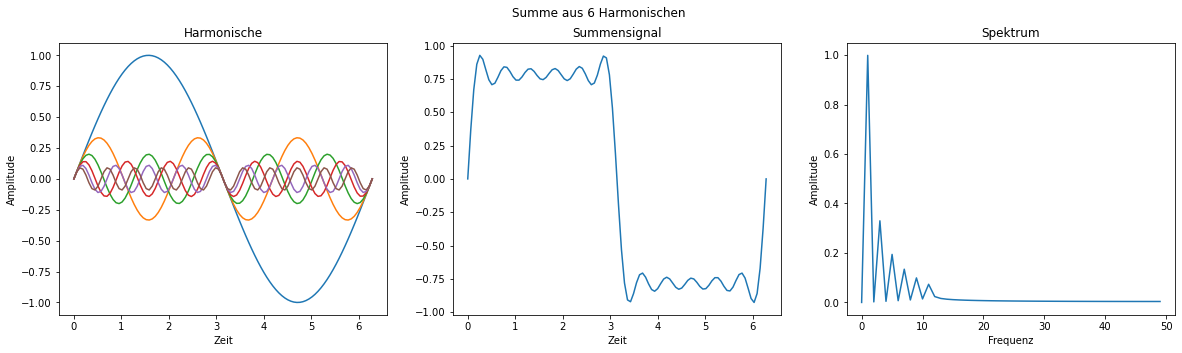

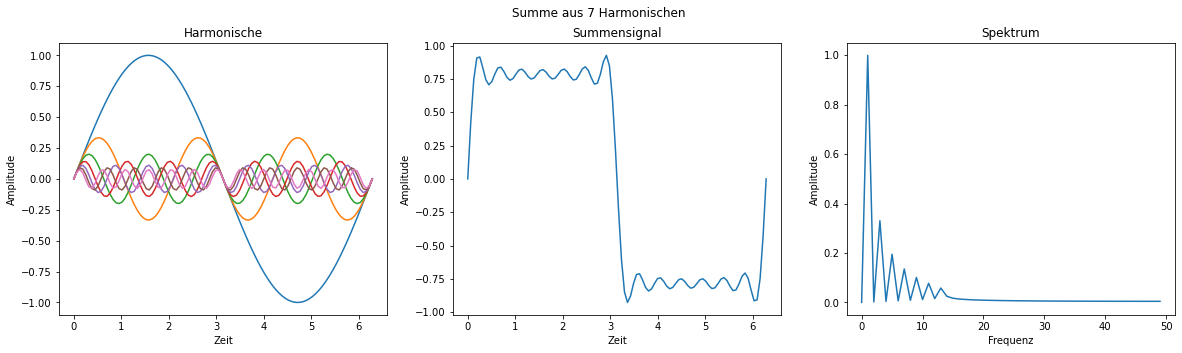

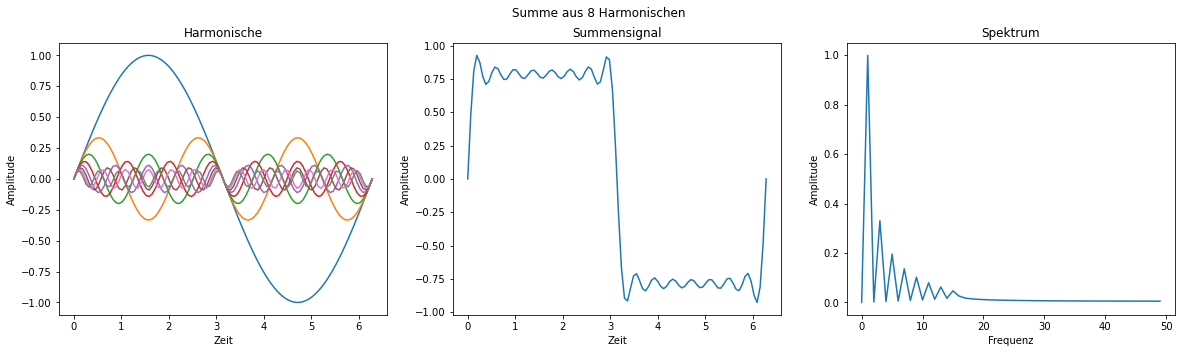

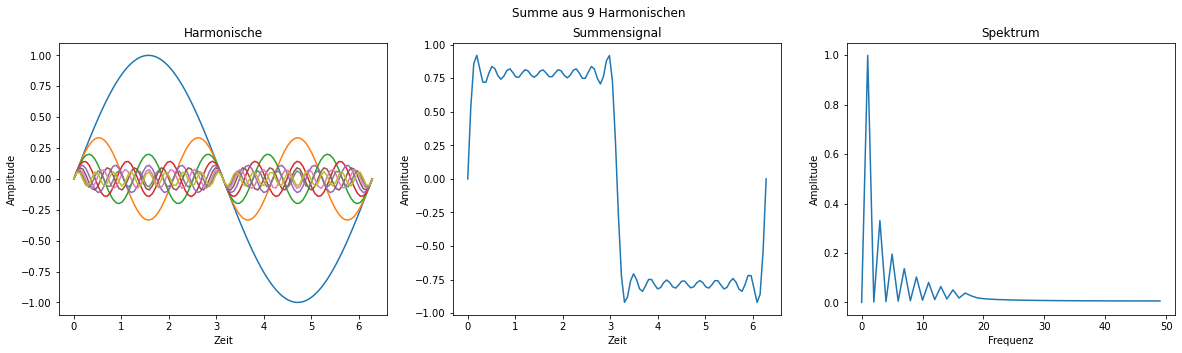

In [4]:
import numpy as np
import matplotlib.pyplot as plt

"""
Erzeugt y und y Werte für einen Sinus mit der Frequenz freq im Bereich 0 bis 2pi

"""
def create_sinwave(freq):
    xs = np.linspace(0,2*np.pi,100)
    ys = np.sin(xs*freq)/freq
    return xs,ys

"""
Erzeugt eine Liste mit ungeraden Zahlen von 0 bis zur Zahl n

"""
def odd_numbers(n):
    return [i for i in range(1,n,2)]

"""
Erzeugt eine Liste mit geraden Zahlen von 0 bis zur Zahl n

"""
def even_numbers(n):
    return [i for i in range(2,n,2)]

"""
Hier werden 10 einzelne Bilder erzeugt, wobei jedes Bild aus 3 Plots besteht.
Vonm Bild zu Bild erhöht sich die Anzahl der beteiligten Harmonischen.
Das linke Bild zeigt Harmonische in einem Graph, das mittlere Bild zeigt die Summe der Harmonischen, das rechte Bild zeigt das Spektrum des "Rechtecksignals".

Lernziel:
Wält man ungerade Harmonische und addiert diese, nähert sich die Summe der Harmonischen immer mehr einem Rechtecksignal an.
Ein ideales Rechtecksignal besteht also aus der Summe unendlich vieler ungerader harmonischer Sinussignale.
Man kann auch sagen, je steiler die Flanken eines Rechtecksignals, je mehr Sinussignale stecken darinnen, je Breiter ist also
das Spektrum der enthaltenen Sinussignale.

Idee für eigenen Experimente:
Ändern Sie den Code doch einmal so, dass nur gerade Harmonische addiert werden. Welche Signalform ergibt sich dann als Summe?

"""
for i in range(1,10):
    sumY = 0
    fig = plt.figure()
    fig.set_size_inches(20,5)
    fig.suptitle("Summe aus " + str(i) + " Harmonischen")
    ax1 = fig.add_subplot(131)
    ax1.set_title("Harmonische")
    ax1.set_xlabel("Zeit")
    ax1.set_ylabel("Amplitude")

    ax2 = fig.add_subplot(132)
    ax2.set_title("Summensignal")
    ax2.set_xlabel("Zeit")
    ax2.set_ylabel("Amplitude")

    ax3 = fig.add_subplot(133)
    ax3.set_title("Spektrum")
    ax3.set_xlabel("Frequenz")
    ax3.set_ylabel("Amplitude")

    oddHarmonics = odd_numbers(1+(i*2))
    
    for harmonic in oddHarmonics:
        x,y = create_sinwave(harmonic)
        sumY = sumY+y
        ax1.plot(x,y)

    ax2.plot(x,sumY)

    fourierTransform = np.fft.fft(sumY)/len(sumY)
    fourierTransform = fourierTransform[range(int(len(sumY)/2))]
    tpCount     = len(sumY)
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/len(x)
    frequencies = values/timePeriod
    
    ax3.plot(frequencies,abs(fourierTransform)*2)
    

plt.show()
